# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

- *The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer* 

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Checking the shape of the dataset (dimensions)
df.shape

(1898, 9)

#### Observations:
- *The dataset has 1,898 rows and 9 columns*

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- *All the columns seem to have 1,898 observations.*
- *The dataset consist of the following data types; 4 integer type (order_id, customer_id, food_preparation_time, delivery_time), 4 object types (restaurant_name, cuisine_type, day_of_the_week, rating), and 1 float type (cost_of_the_order)*

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
#checking for missing values across each columns.
df.isnull().sum()   

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
- *According to the check above, there is no missing values in any of the columns. However, we are going to take a closer look at the 'rating' column as it appears when reading the first 5 rows of the dataset above that there are observations labelled 'Not given'*

In [7]:
#Check missing values further
df['rating'].value_counts(normalize=True, dropna=False)  

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

#### Observations
- *It looks like 38% of observations in the 'rating' column was labled as 'not given'*
- *The percentage of missing values is more than the percentage of observations from any other ratings*
- *Therefore, I will leave the missing values ('Not given') as-is and treat them as a seperate category for this variable*

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Lets analyze the statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
- *The minimum time for food preparation is 20 minutes*
- *The maximum time for food preparation is 35 minutes*
- *The average time for food preparation is 27.4 minutes*

### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# Lets count the number of entries in each unique categories of the 'rating' columns
df.groupby('rating')['order_id'].count()

rating
3            188
4            386
5            588
Not given    736
Name: order_id, dtype: int64

#### Observations:
- *There are 736 orders (38.8%) that are not rated*


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Observations on Customers Frequency

In [10]:
plt.figure(figsize = (250,75))     #Visualize number of customers with a Bar Graph
sns.countplot(data = df, x = 'customer_id')

<AxesSubplot:xlabel='customer_id', ylabel='count'>

In [11]:
df['customer_id'].nunique()   #Find number of unique customers

1200

In [12]:
df['customer_id'].value_counts().unique()     #Get the count of unique categorical levels

array([13, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [13]:
array = df['customer_id'].value_counts()
array1 = pd.DataFrame(array)
array1.value_counts()

customer_id
1              784
2              267
3               83
4               33
5               19
6                6
7                4
8                1
9                1
10               1
13               1
dtype: int64

- *There are a total of 1200 unique customers*
- *Majority of the customers (784) have only made one order/purchase*
- *The highest orders from one single customer is 13 orders*

#### Observations on Cuisine Type

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'American'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Italian'),
  Text(3, 0, 'Chinese'),
  Text(4, 0, 'Mexican'),
  Text(5, 0, 'Indian'),
  Text(6, 0, 'Middle Eastern'),
  Text(7, 0, 'Mediterranean')])

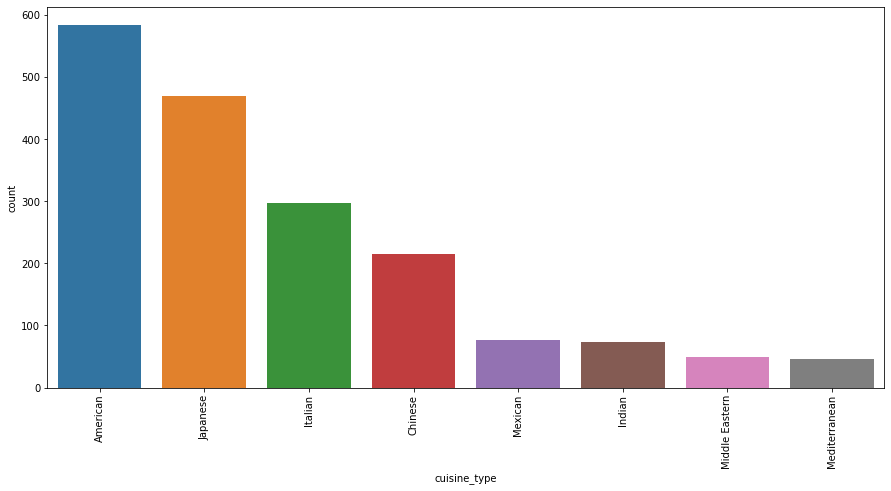

In [14]:
plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='cuisine_type', order=df.cuisine_type.value_counts().iloc[:8].index);
plt.xticks(rotation = 90)

- *The top five cuisine types are American, Japanese, Italian, Chinese, and Mexican, in that order*
- *American cuisine has over 500 orders placed*

#### Observations on Day of the Week

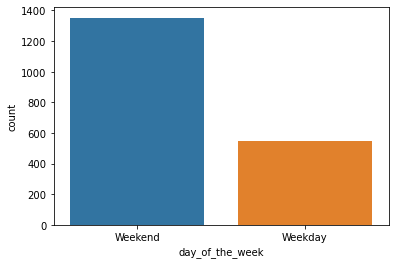

In [15]:
sns.countplot(data=df,x='day_of_the_week');

- *The number of orders is significantly more (over double) on the weekends than on weekdays*

#### Observations on Rating

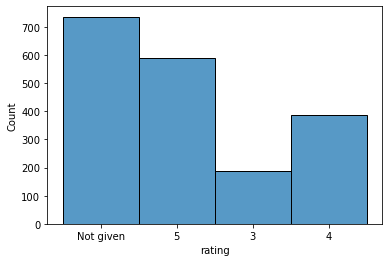

In [16]:
sns.histplot(data=df,x='rating')
plt.show()

- *Most orders in this dataset were not rated*
- *Order with ratings ranged from 3 -5, with "3" having the lowest obesrvation and "5" having the highest observation*

#### Observations on Cost of Orders

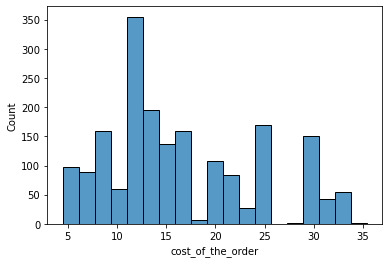

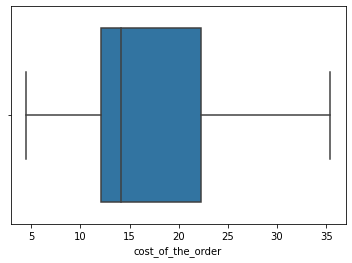

In [17]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

- *Cost of Orders does not have any outliers*
- *50% (min - median) of the cost of orders are less than $14 (~ 10 dollars margin), indicating 'one-person' meals*
- *Cost of Orders is positively (right) skewed*

#### Observations on Food Preparation Time

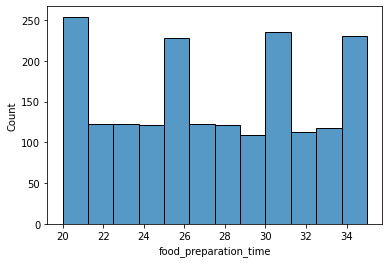

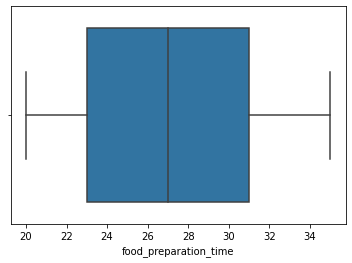

In [18]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

- *Food Preparation Time does not have any outliers*
- *50% of meals are prepared under 27 minutes*
- *The box plot suggests that it is a normal distribution; however, the histogram does not have a well-defined bell curve shape*

#### Observations on Delivery Time

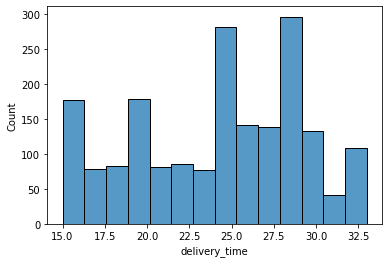

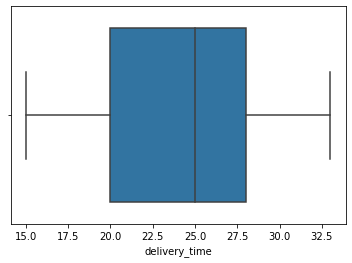

In [19]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

- *Delivery Time does not have any outliers*
- *Delivery Time distribution is negatively (left) skewed*

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [20]:
# Write the code here
top5_restaurant=df.groupby('restaurant_name').count()[['order_id']].sort_values('order_id', ascending=False).reset_index().head(10) #top 10 restaurants in terms of no. of orders
top5_restaurant       

,restaurant_name,order_id
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68
5,RedFarm Broadway,59
6,RedFarm Hudson,55
7,TAO,49
8,Han Dynasty,46
9,Blue Ribbon Sushi Bar & Grill,44


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Shake Shack'),
  Text(1, 0, 'The Meatball Shop'),
  Text(2, 0, 'Blue Ribbon Sushi'),
  Text(3, 0, 'Blue Ribbon Fried Chicken'),
  Text(4, 0, 'Parm'),
  Text(5, 0, 'RedFarm Broadway'),
  Text(6, 0, 'RedFarm Hudson'),
  Text(7, 0, 'TAO'),
  Text(8, 0, 'Han Dynasty'),
  Text(9, 0, 'Blue Ribbon Sushi Bar & Grill')])

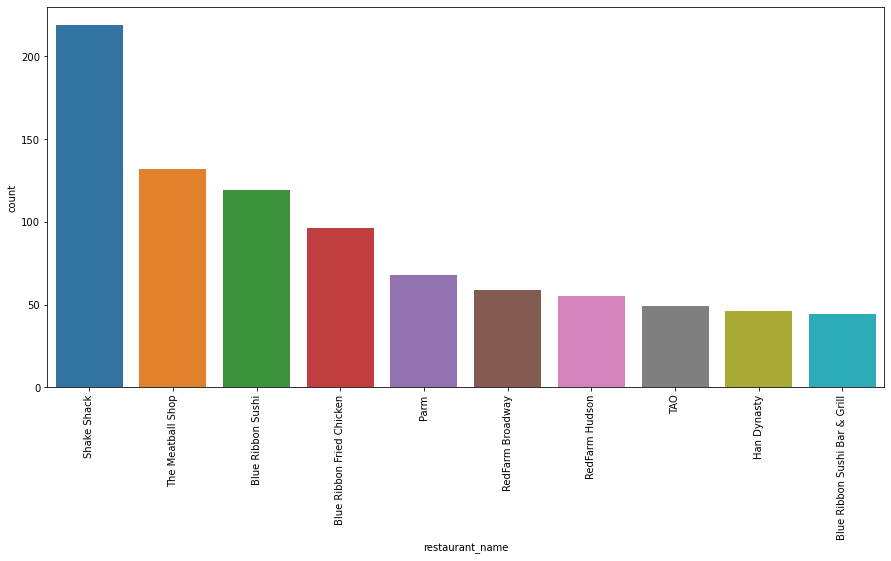

In [21]:
plt.subplots(figsize = (15,7))
sns.countplot(data = df, x = 'restaurant_name', order = df.restaurant_name.value_counts().iloc[:10].index)
plt.xticks(rotation = 90)

#### Observations:
- *The top five restaurants in terms of orders  are:*
- *1.'Shake Shack'*
- *2.'The Meatball Shop'*
- *3.'Blue Ribbon Sushi'*
- *4.'Blue Ribbon Fried Chicken'*
- *5.'Parm'*


- *Only 3 restaurants have had over 100 orders*

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [22]:
# Write the code here
df.groupby(['day_of_the_week','cuisine_type'])[['order_id']].count().sort_values('order_id',ascending=False).head(10) #checking the number of cuisine type in descending order, only viewing the first ten rows.

order_id
day_of_the_week cuisine_type          
Weekend         American           415
                Japanese           335
                Italian            207
Weekday         American           169
Weekend         Chinese            163
Weekday         Japanese           135
                Italian             91
Weekend         Mexican             53
Weekday         Chinese             52
Weekend         Indian              49

#### Observations:
The most popular cuisine on the weekend is 'American' with a total of 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [23]:
# Write the code here
(df.groupby([df['cost_of_the_order']>20])['order_id'].nunique()/df.groupby([df['cost_of_the_order']>20])['order_id'].nunique().sum())  #checking the number of orders that cost more than 20 dollars and dividing it by the total to get a percentage

cost_of_the_order
False    0.707587
True     0.292413
Name: order_id, dtype: float64

#### Observations:
- *The percentage of the orders that cost more than 20 dollars is 29.2%*

### **Question 10**: What is the mean order delivery time? [1 mark]

In [24]:
# Write the code here
round(df.delivery_time.mean(), 2)  #checking the mean order delivery time and round to two decimal places

24.16

#### Observations:
- *The mean order delivery time is 24.16 minutes*

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [25]:
# Write the code here
df.groupby(['customer_id'])[['order_id']].count().sort_values('order_id',ascending=False).head(5)   #checking customer orders in descending order, only viewing the first five rows.

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7


#### Observations:
- *The top 5 most frequent customers are Customer IDs 52832, 47440, 83287, 250494, & 65009 having placed 13, 10, 9, 8, & 7 number of orders respectively*

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


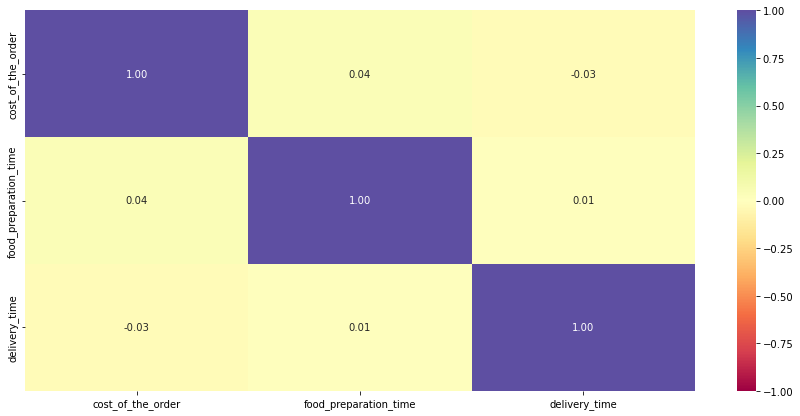

In [26]:
# Write the code here
#Check for correlation between numerical variables
num_var = ['cost_of_the_order','food_preparation_time','delivery_time']

corr = df[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:
- *There doesn't seem to be any strong correlation between any of the numerical variables*

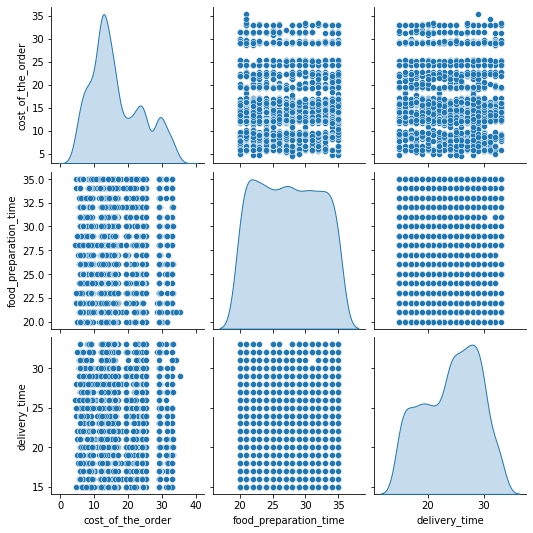

In [27]:
#plot the bivariate scatter plot
sns.pairplot(data=df[num_var], diag_kind="kde")
plt.show()

#### Observations:
- *The plots tell us the same story as the heatmap*
- *There doesn't seem to be any strong correlation between any of the numerical variables*

#### Lets check if there is any signicant effect of categorical variables on cost of orders

##### Cost of Order for the different Cuisine Types

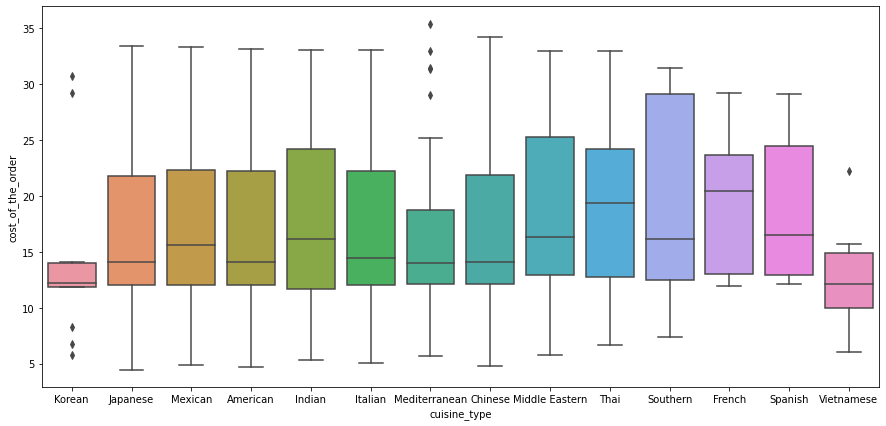

In [28]:
#check the cost distribution of the various cuisine types using boxplots
plt.figure(figsize=(15,7))           
sns.boxplot(x=df['cuisine_type'], y=df['cost_of_the_order'])
plt.ylabel('cost_of_the_order')
plt.xlabel('cuisine_type')
plt.show()

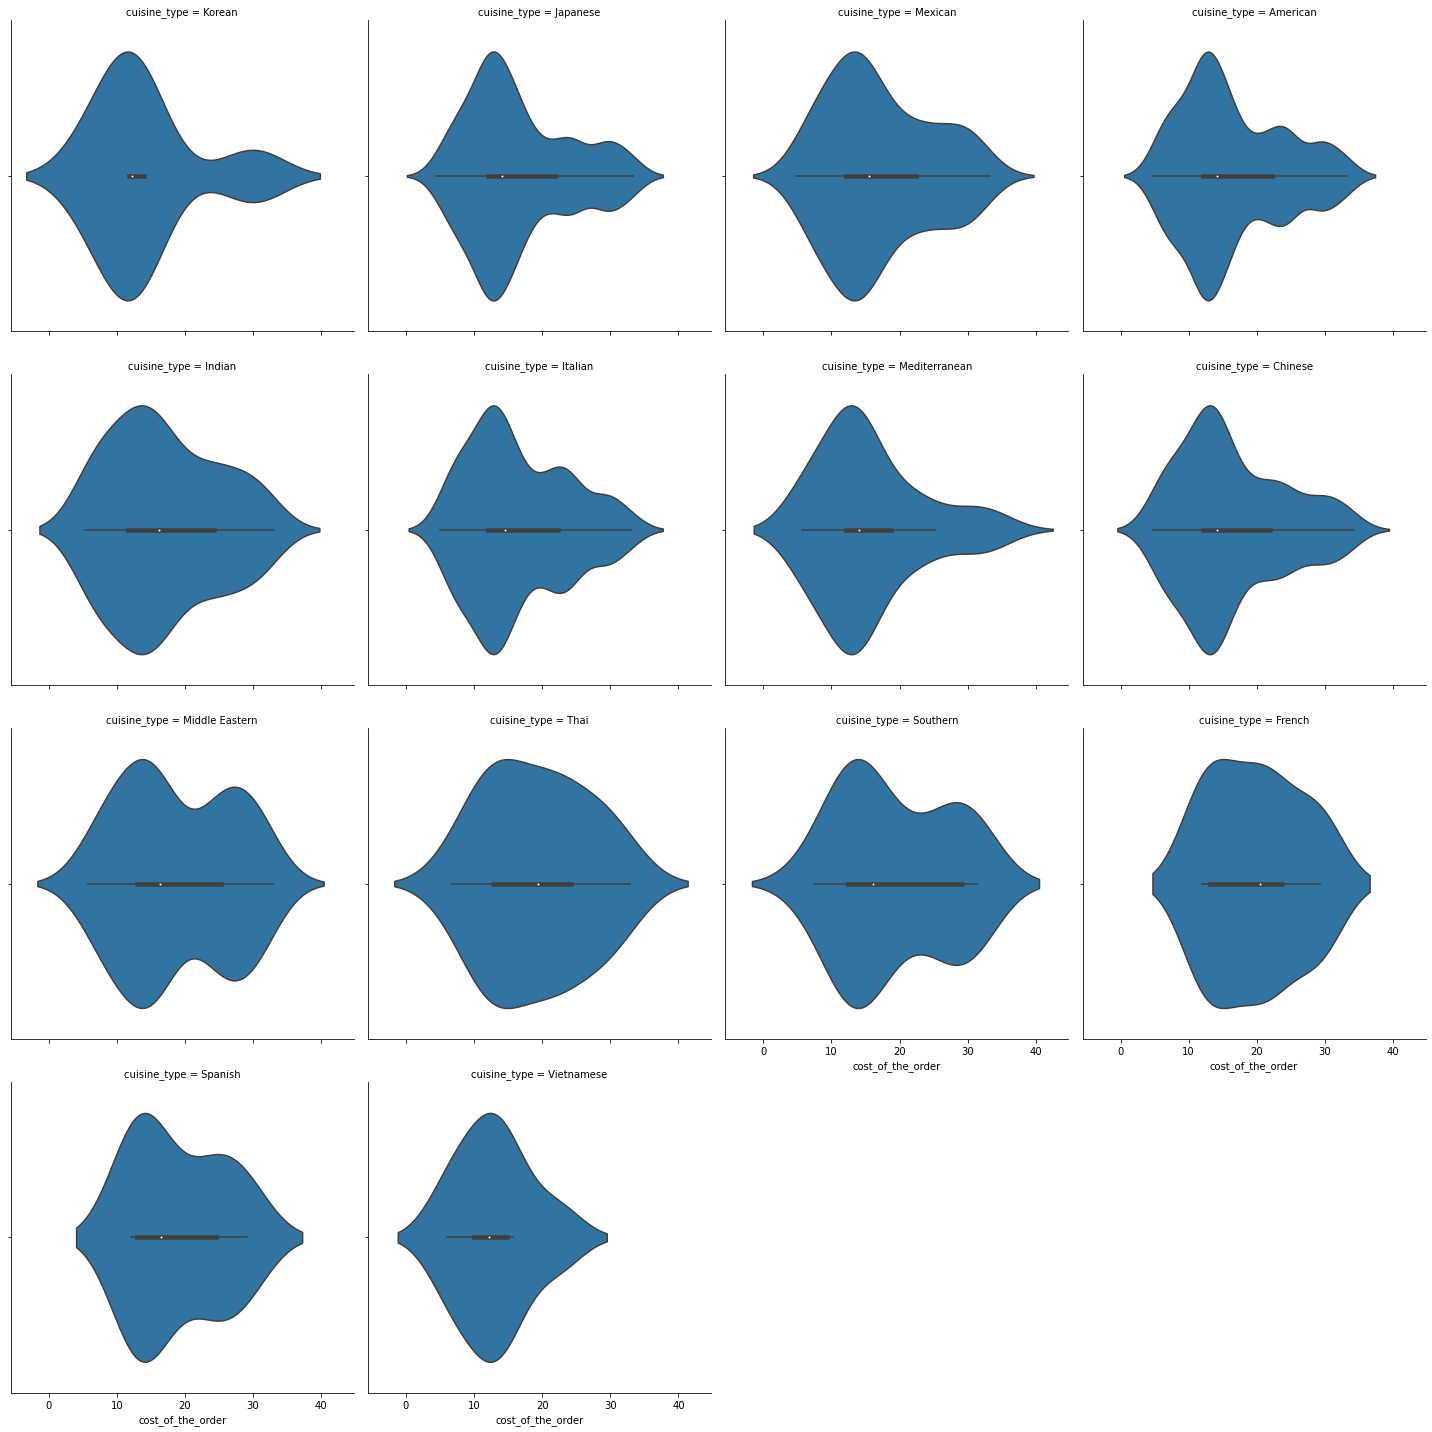

In [29]:
#Dispersion of cost for different cuisine types using violin plot
sns.catplot(x='cost_of_the_order', col='cuisine_type', data=df, col_wrap=4, kind="violin")
plt.show()

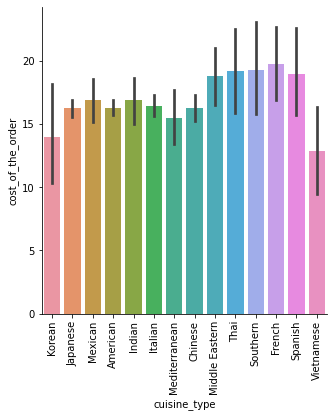

In [30]:
#View relationship using Catplot
sns.catplot(x='cuisine_type', y='cost_of_the_order', data=df, kind="bar")
plt.xticks(rotation = 90)
plt.show()


#### Observations:
- *50% of the cost of orders are between $12 - $25 except for 'southern' & 'Vietnamese' cuisines*
- *'Korean', 'Mediterranean', & 'Vietnamese' cuisines have some outliers prices*
- *'French' cuisine has the highest mean cost while & 'Vietnamese' cuisine has the lowest mean cost of order*

##### Relationship between Cost of Order and Day of The Week

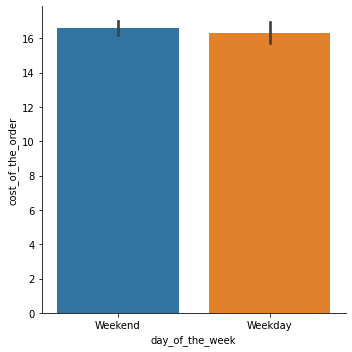

In [31]:
#View relationship using Catplot
sns.catplot(x='day_of_the_week', y='cost_of_the_order', data=df, kind="bar")
plt.show()

#### Observations:
- *The mean of the cost of orders on the weekend is slightly higher than orders on the weekends*

<AxesSubplot:xlabel='cost_of_the_order', ylabel='Count'>

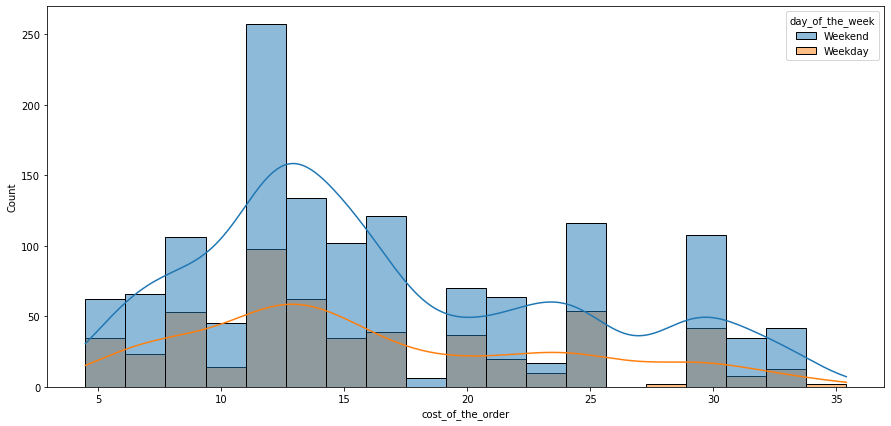

In [32]:
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'cost_of_the_order', hue = 'day_of_the_week', kde = True)

#### Observations:
- *This cost of order histogram shows the difference in orders between the days of the weeks*
- *Customers place more orders on the weekend*

##### Relationship between Cost of Order and Ratings

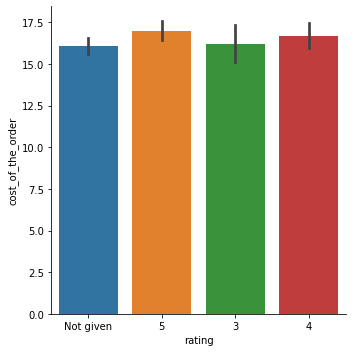

,rating,cost_of_the_order
0,Not given,16.085340
1,3,16.223351
2,4,16.710337
3,5,16.965697


In [33]:
#View relationship using Catplot
sns.catplot(x='rating', y='cost_of_the_order', data=df, kind="bar")
plt.show()
delivery_time=df.groupby('rating').mean()[['cost_of_the_order']].sort_values('cost_of_the_order', ascending=True).reset_index()
delivery_time

#### Observations:
- *Orders with higher cost generally seem to have higher ratings*

#### Lets check if there is any signicant effect of categorical variables on Food Preparation Time

##### Food Preparation TIme for the different Cuisine Types

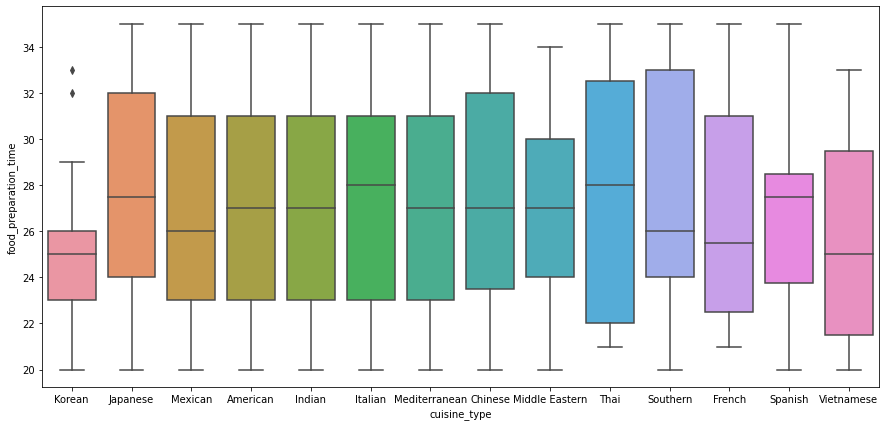

In [34]:
#check the delivery time of the various cuisine types using boxplots
plt.figure(figsize=(15,7))           
sns.boxplot(x=df['cuisine_type'], y=df['food_preparation_time'])
plt.ylabel('food_preparation_time')
plt.xlabel('cuisine_type')
plt.show()

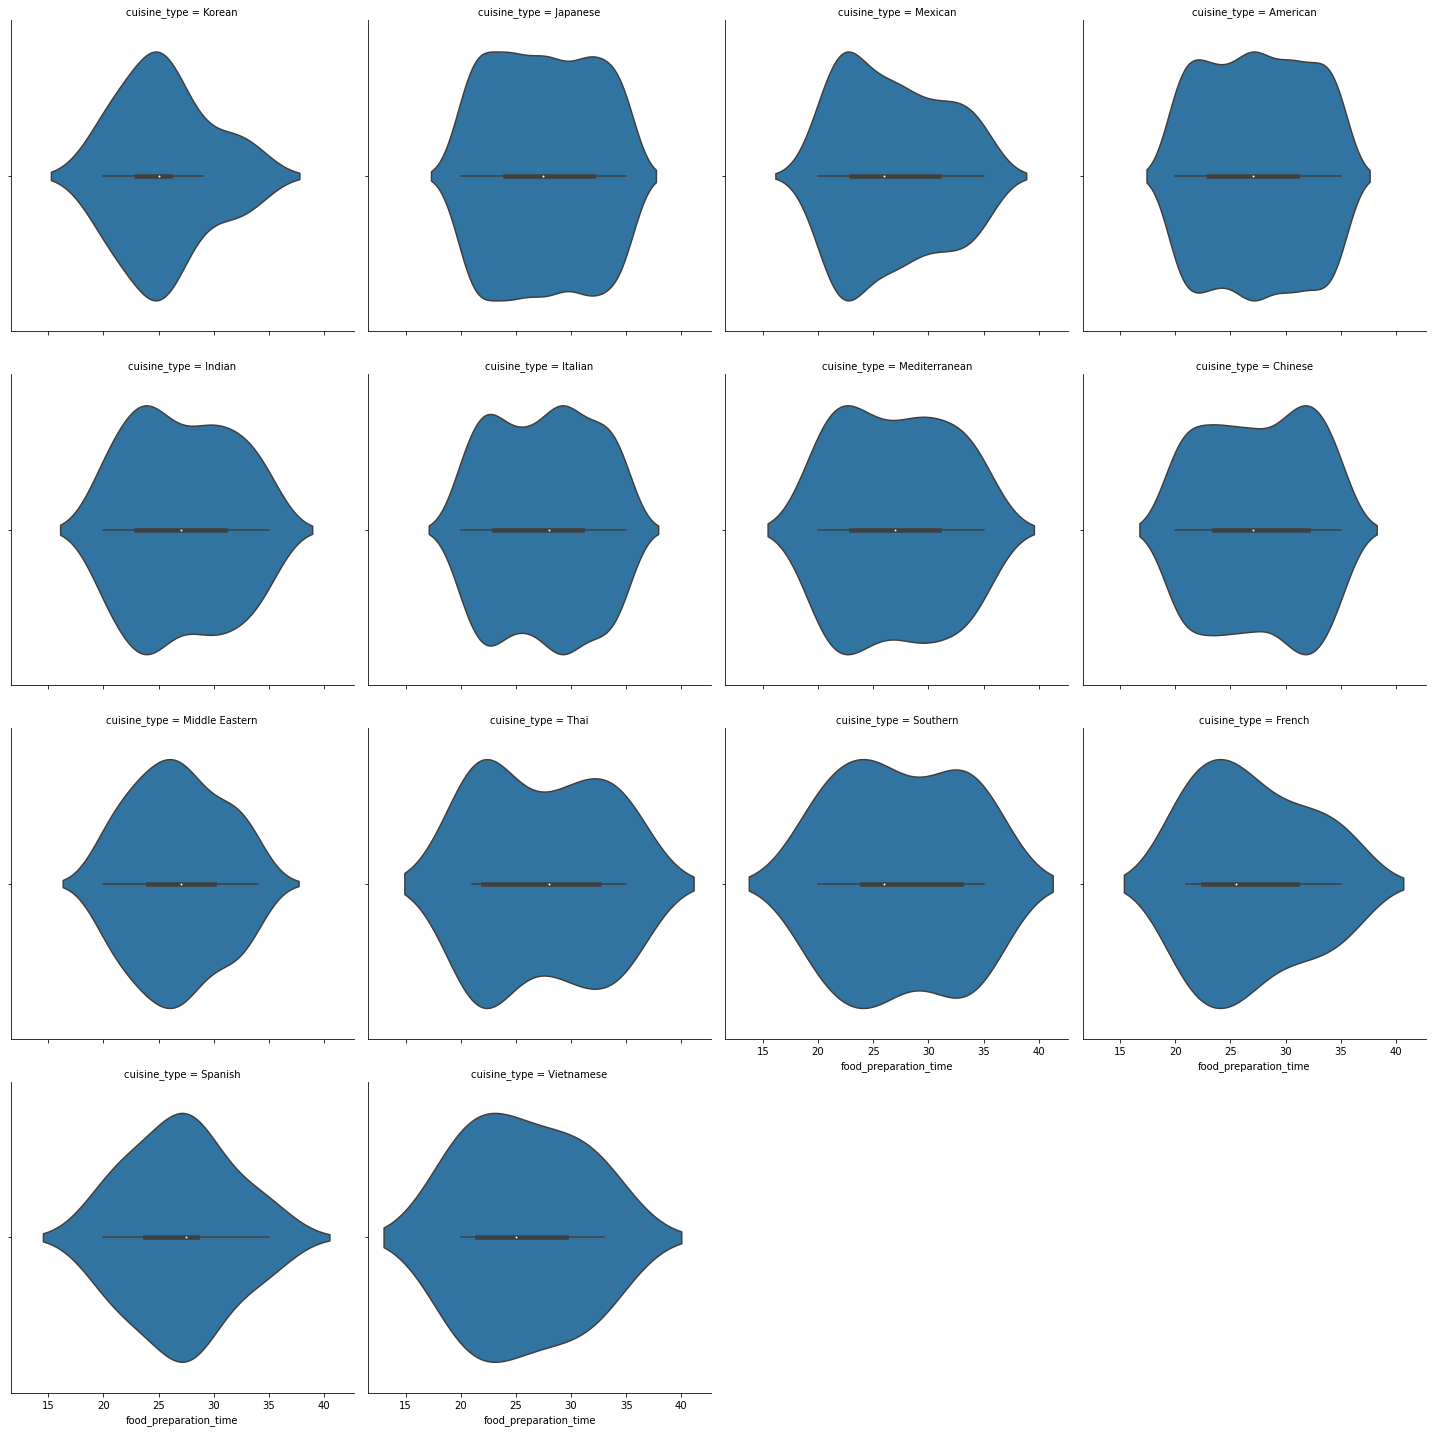

In [35]:
#Dispersion of delivery time for different cuisine types using violin plot
sns.catplot(x='food_preparation_time', col='cuisine_type', data=df, col_wrap=4, kind="violin")
plt.show()

#### Observations:
- *Korean cuisine have some outliers in delivery time*
- *All other cuisine seem to have a consistent delivery time with no outliers*

##### Food Preparation Time for the different Days of the Week

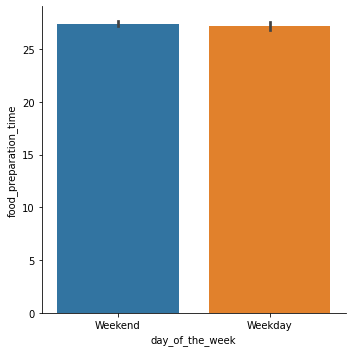

In [36]:
#View relationship using Catplot
sns.catplot(x='day_of_the_week', y='food_preparation_time', data=df, kind="bar")
plt.show()

#### Observations:
- *There is no significant difference in food preparation time between the days of the week*

##### Average Food Preparation Time for the different Rating

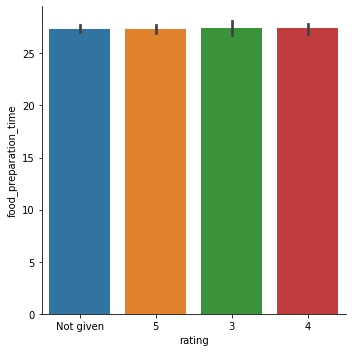

In [37]:
#View relationship using Catplot
sns.catplot(x='rating', y='food_preparation_time', data=df, kind="bar")
plt.show()

#### Observations:
- *There is no significant difference in food preparation time between the different ratings*

#### Lets check if there is any signicant effect of categorical variables on Delivery Time

##### Delivery Time for the different Cuisine Types

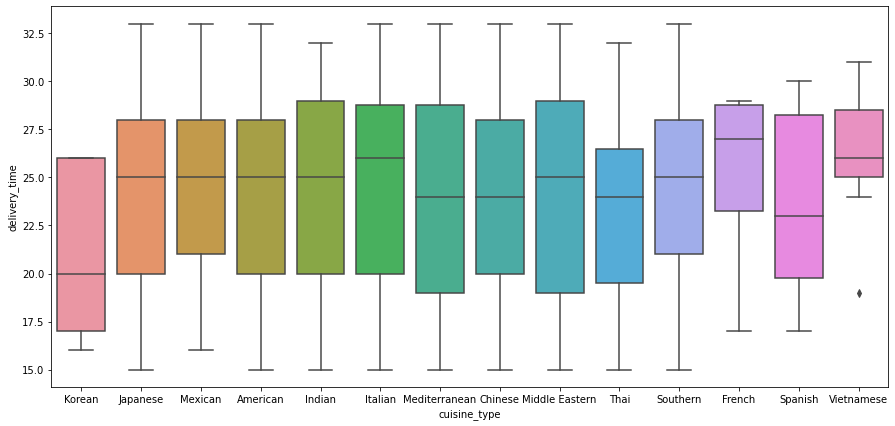

In [38]:
#check the delivery time of the various cuisine types using boxplots
plt.figure(figsize=(15,7))           
sns.boxplot(x=df['cuisine_type'], y=df['delivery_time'])
plt.ylabel('delivery_time')
plt.xlabel('cuisine_type')
plt.show()

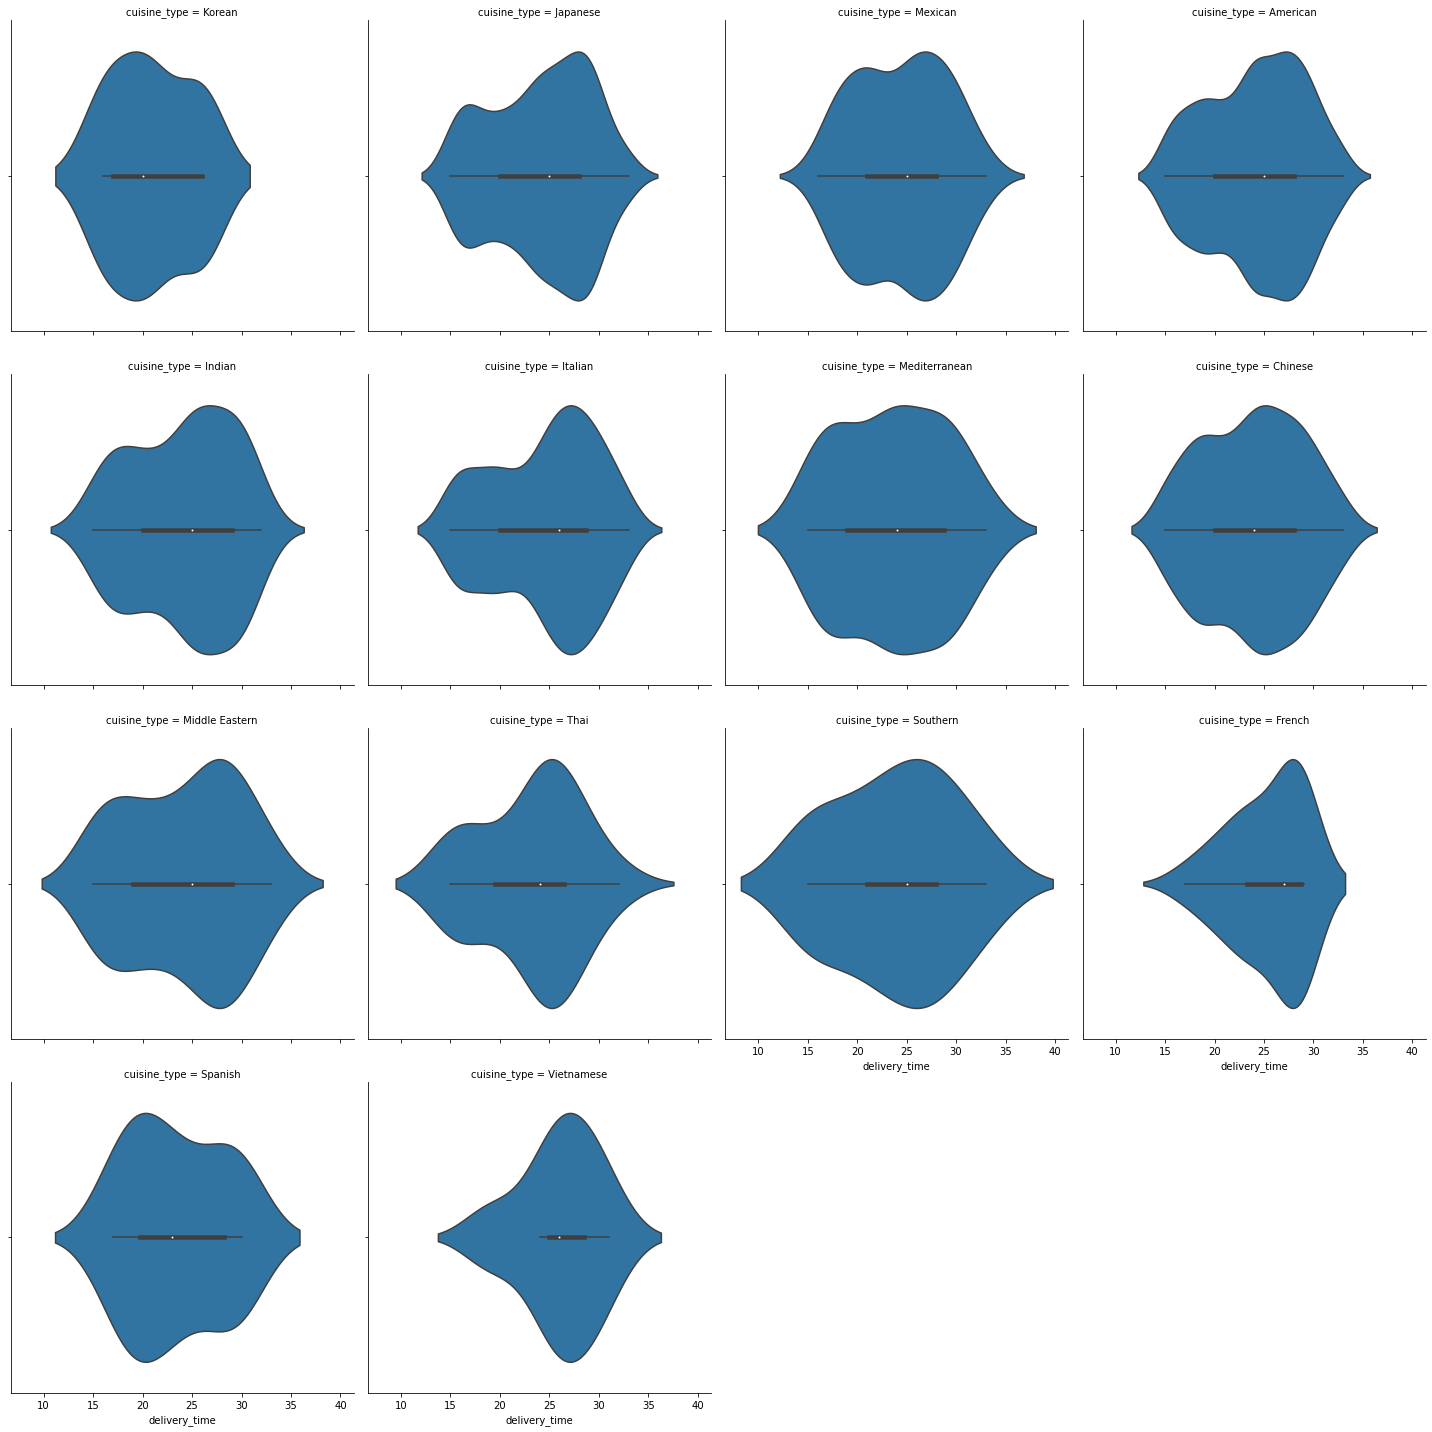

In [39]:
#Dispersion of delivery time for different cuisine types using violin plot
sns.catplot(x='delivery_time', col='cuisine_type', data=df, col_wrap=4, kind="violin")
plt.show()

#### Observations:
- *The delivery time for Vietnamese, French, & Italian foods are generally higher*

##### Delivery Time for the different Day of the Week

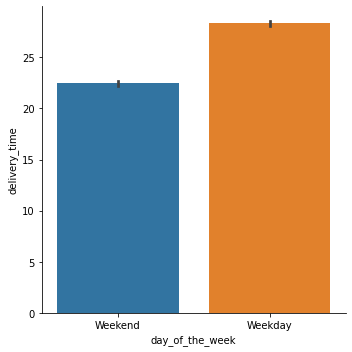

,day_of_the_week,delivery_time
0,Weekend,22.470022
1,Weekday,28.340037


In [40]:
#View relationship using Catplot
sns.catplot(x='day_of_the_week', y='delivery_time', data=df, kind="bar")
plt.show()
delivery_time=df.groupby('day_of_the_week').mean()[['delivery_time']].sort_values('delivery_time', ascending=True).reset_index()
delivery_time

#### Observations:
- *Average food preparation time is higher on the weekday than the weekends. This counter-intuitive to the observation made on the mean number of orders as there are more orders (double) to fulfill on the weekends than during the week. This might suggest that there are a low number of FoodHub delivery employees during the week than the weekend or might be as a result of traffic conditions during the week* 

##### Delivery Time for the different Ratings

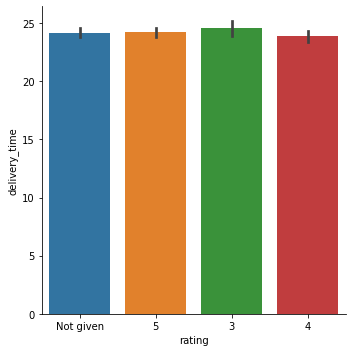

In [41]:
#View relationship using Catplot
sns.catplot(x='rating', y='delivery_time', data=df, kind="bar")
plt.show()

#### Observations:
- *Orders with higher (longer) delivery time have the lowest (3) rating* 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [42]:
# Write the code here
df1 = df.drop(df.index[(df['rating'] != '3') & (df['rating'] != '4') & (df['rating'] != '5')]) #remove 'not given' ratings observation and make a copy of dataset 
df1

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [43]:
df1['restaurant_name'].value_counts() > 50    #Filtering out only restaurants that appears more than 50 times

Shake Shack                     True
The Meatball Shop               True
Blue Ribbon Sushi               True
Blue Ribbon Fried Chicken       True
RedFarm Broadway               False
                               ...  
Philippe Chow                  False
Dirty Bird To Go (archived)    False
The MasalaWala                 False
Kambi Ramen House              False
'wichcraft                     False
Name: restaurant_name, Length: 156, dtype: bool

In [44]:
df2 = df1.drop(df1.index[(df1['restaurant_name'] != 'Shake Shack')
                   &(df1['restaurant_name'] != 'Blue Ribbon Fried Chicken')
                   &(df1['restaurant_name'] != 'The Meatball Shop')
                   &(df1['restaurant_name'] != 'Blue Ribbon Sushi')])    #Drop all restaurants that do not satisfy the boolean condition above
df2

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26
22,1478287,150599,Shake Shack,American,29.10,Weekday,5,21,30
...,...,...,...,...,...,...,...,...,...
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1886,1478277,48282,The Meatball Shop,American,14.50,Weekend,5,34,25


In [45]:
for col in ['rating']:
    df2[col] = df2[col].astype('int')        #change the data type of ratings to integer in order to be able to calculate the mean

In [46]:
df2.groupby('restaurant_name')['rating'].mean().sort_values(ascending = False)  #Extract only restaurants that meet both conditions

restaurant_name
The Meatball Shop            4.511905
Blue Ribbon Fried Chicken    4.328125
Shake Shack                  4.278195
Blue Ribbon Sushi            4.219178
Name: rating, dtype: float64

#### Observations:
- *There are 4 restaurants that fulfill the criteria namely; 'The Meatball Shop', 'Blue Ribbon Fried Chicken', 'Shake Shack', 'Shake Shack'*

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [47]:
# Write the code here
revenue=0   #initialize the revenue to be zero
count=0
Total=0
for i in df['cost_of_the_order']:      #loop through every observation in 'cost_of_order' column
    if i > 20:                         #First condition for cost greater than $20
        revenue=revenue +(i*0.25)      #Add 25% of cost to company's revenue
        count=count+1
        Total=Total+1
    elif (5<i<20):                     #Second condition for cost greater than $5 but lesser than $20
        revenue=revenue + (i*0.15)     #Add 20% of cost to company's revenue
        Total=Total+1
    else:
        revenue=revenue + (i*0)
        Total=Total+1
print("Total Revenue is", round(revenue,2))
print("The percentage of orders greater than $20 are", round(count/Total*100,2),"%")

Total Revenue is 6166.3
The percentage of orders greater than $20 are 29.24 %


#### Observations:
The net revenue generated by the company across all orders is $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [48]:
# Write the code here
df['Total_Delivery_Time']=df['food_preparation_time']+df['delivery_time']  #Create a column with a sum of delivery time and food preparation time
df.head()  #view the data and see if the new column appears and makes sense

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Total_Delivery_Time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [49]:
(df.groupby([df['Total_Delivery_Time']>60])['order_id'].nunique()/df.groupby([df['Total_Delivery_Time']])['order_id'].nunique().sum())  #checking the number of orders that took a total time of over 60 minutes and dividing it by the total to get a percentage

Total_Delivery_Time
False    0.894626
True     0.105374
Name: order_id, dtype: float64

#### Observations:
10.5% of all orders take a total time of over an hour to get delivered

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

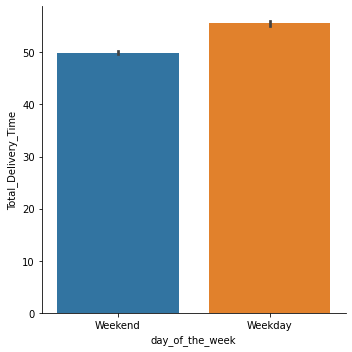

In [50]:
# Write the code here
#View relationship using Catplot
sns.catplot(x='day_of_the_week', y='Total_Delivery_Time', data=df, kind="bar")
plt.show()

In [51]:
Mean_Delivery_Time=df.groupby('day_of_the_week').mean()[['Total_Delivery_Time']].sort_values('Total_Delivery_Time', ascending=True).reset_index()
Mean_Delivery_Time

,day_of_the_week,Total_Delivery_Time
0,Weekend,49.906736
1,Weekday,55.552102


#### Observations:
- *It generally takes a longer time for orders to be delivered (preparation + delivery) on the weekday (55.6 mins) than the weekends (49.9 mins). This observation is consistent with the 'Delivery Time' plot looked at above. This might be as a result of more traffic during the week. It could also be that the FoodHub delivery employees are lower during the weekedays than the weekends*

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
- * CONCLUSION 1. Majority of FoodHub customers (65%) have ordered only ONCE, followed by 22% ordering only TWICE while the customer with the highest order is one person with 13 orders. There is need for the company to look at why majority of customers are not using the platform more often


- * CONCLUSION 2. Majority of orders (over double) are placed during the weekends. More people are home during the weekends and are more likely to order food during that period


- * CONCLUSION 3. Delivery time is longer during the week than the weekends. Furthermore, analysis shows that orders with longer delivery time is likely to have a lower ratings  (customer experience). Therefore, there needs to be a strategy on how to reduce delivery time during the  week in order to minimize it's impact on customer experience


- * CONCLUSION 4. 50% of orders cost less than 14 USD and another 21% range between 14-20 USD, which is a 15% commission. However, a greater commission (25%) is earned with orders over 20 USD of which only 29.2% of the total orders satisfy.




### Recommendations:

- * RECOMMENDATION 1. Customers who ordered once or twice (~88% of all customers) should be should offered some discount (maybe 30% off) during weekdays, when orders are usually lesser. This will incentivize this population to order more, which will increase the number of orders during the week. Additionally, this population should be surveyed to understand their experiences and identify the root cause of the non-retention. 


- * RECOMMENDATION 2. FoodHub and restaurants to continue to or better still improve their staffing need in order to meet their demand during the weekend. To promote demands during the week,institute promotions for different meals and delivery charges during this period. More data could be collected for holidays to see if demand micmics any of the day of the week. 


- * RECOMMENDATION 3. FoodHub needs to look at more data to identify the reason for the longer delivery time during the week. If there are less FoodHub delivery employees during the week than the demand, an incentive should be offered to drivers in order to balance this demand and supply. If there the data shows traffic congestion as a cause, FoodHub should promote the use of bicycles or scooters by delivery employees for short to medium distant locations.


- * RECOMMENDATION 4. For customers that have orders less than 20 USD (71%), FoodHub could introduce an approach of adding on a 'Recommended Extras List' of condiments, snacks, or deserts towards the end of the ordering process, totalling it up to over 20 USD in order to increase revenue of the companyOfAdditionally, FoodHub can also offer a 5% discount on delivery fee for orders over 20 USD  knowing fully well that it will still increase the amount of their revenue if more people can order them.*

---